In [9]:
# Baseado em: https://scipython.com/blog/visualizing-a-vector-field-with-matplotlib/
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

In [10]:
E0 = 8.8e-12 # Permissividade dieletrica no vacuo [C^2/(N*m^2)]
K = 1/(4*np.pi*E0) # Calcular K por conveniencia [(N*m^2)/C^2]
e = 1.60217662e-19 # Carga do eletron [C]
vermelho = '#ff0000'
azul = '#0000ff'

In [11]:
def E(q, r0, x, y):
    # Calcula campo eletrico gerado por uma carga q na posicao r0 sobre o ponteo (x,y).
    den = np.hypot(x-r0[0], y-r0[1])**3 # |r|^3
    # Calculo separado por componentes
    Ex = K * q * (x - r0[0]) / den # q*r21/|r21|^3
    Ey = K * q * (y - r0[1]) / den
    return Ex, Ey 

In [12]:
# Gera uma grade de pontos para os quais o campo será calculado
nx, ny = 128, 128
x = np.linspace(-2, 2, nx)
y = np.linspace(-2, 2, ny)
X, Y = np.meshgrid(x, y)

In [13]:
EtotalX = np.zeros((ny, nx)) #Campo resultante em X
EtotalY = np.zeros((ny, nx)) #Campo resultante em Y

In [14]:
cargas = [(e,(-1, 0))] # Formato: (Carga, (posicao_x, posicao_y)),(Carga, (posicao_x, posicao_y)),... 

In [15]:
# Calcula a contribuicao de cada carga para o campo eletrico total
for charge in cargas:
    ex, ey = E(*charge, x=X, y=Y)
    EtotalX += ex
    EtotalY += ey

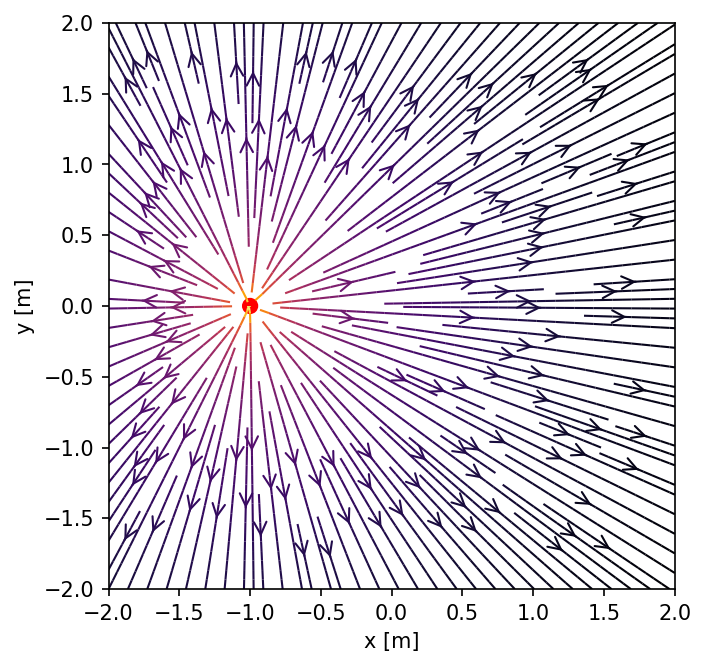

In [16]:
# Mostra os resultados
fig = plt.figure(figsize=(5,5), dpi= 150)
ax = fig.add_subplot(111)

# Colore de acordo com magnitude do vetor e mapeia para escala logaritmica
color = 2 * np.log(np.hypot(EtotalX, EtotalY)) 

ax.streamplot(x, y, EtotalX, EtotalY, color=color, linewidth=1, cmap=plt.cm.inferno,
              density=2, arrowstyle='->', arrowsize=1.5)

# Adiciona circulos coloridos que representam as cargas
for q, pos in cargas:
    if q >0:
        cor = vermelho
    else:
        cor = azul
    ax.add_artist(Circle(pos, radius=0.05, color=cor))

# Identifica eixos
ax.set_xlabel('x [m]')
ax.set_ylabel('y [m]')
ax.set_xlim(-2,2)
ax.set_ylim(-2,2)
ax.set_aspect('equal')
plt.show()

In [17]:
# Exercicio 1: Modifique a lista de cargas para criar um dipolo com orientação em j

In [18]:
# Exercicio 2: Modifique a função E() para que calcule a força sobre uma carga de prova de um elétron